In [31]:
# 引入库
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # Windows系统字体
plt.rcParams['axes.unicode_minus'] = False
# 强制设置全局字体
plt.rcParams['font.family'] = 'Microsoft YaHei'

#### 数据获取

In [32]:
df = pd.read_csv('airline_passenger_satisfaction.csv')
print(df.columns)
df.head()

Index(['ID', 'Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')


,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


#### 数据预处理

(129880, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking         

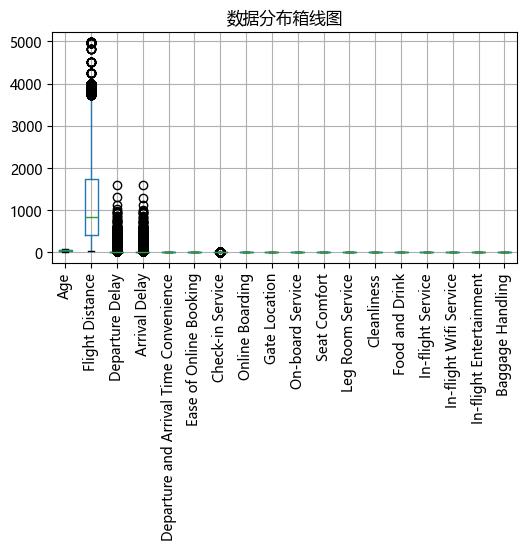

In [33]:
# 查看数据信息
print(df.shape)
print(df.info())

# 使用描述性统计识别异常值
df.describe()

# 使用箱线图可视化异常值
plt.figure(figsize=(6, 3))
df.drop('ID', axis=1).boxplot()
plt.xticks(rotation=90)
plt.title('数据分布箱线图')
plt.show()

In [34]:
#### 查看缺失值

# 方法1：找每列空值的数量
df.isnull().sum()

# # 方法2：用missingno库进行可视化查看
# import missingno as msno
# # 绘制矩阵图，直观展示缺失值分布
# msno.matrix(df)
# plt.show()
# # 绘制柱状图，展示每列的缺失值数量
# msno.bar(df)
# plt.show()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [35]:
####  填充缺失值

# 方法1：均值填充（适用于数值型数据，尤其当数据分布较为均匀，没有明显的异常值时）
# df['Arrival Delay'] = df['Arrival Delay'].fillna(round(df['Arrival Delay'].mean(),2))
# 方法2：中位数填充（适用于存在异常值的数值型数据，减少影响）
df['Arrival Delay'] = df['Arrival Delay'].fillna(round(df['Arrival Delay'].median(),2))
# 方法3：众数填充（更适用于类别型数据，这里是数值型）
# df['Arrival Delay'] = df['Arrival Delay'].fillna(round(df['Arrival Delay'].mode()[0],2))
# 方法4：前向填充（使用前一个非缺失值来填充当前的缺失值，常用于时间序列数据，即数据不会剧烈变化）
# df['Arrival Delay'].fillna(method='ffill', inplace=True)
# 方法5：后向填充
# df['Arrival Delay'].fillna(method='bfill', inplace=True)
# 方法6：回归填充
# 方法7：多重插补法

# 检验是否填充
df.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

In [36]:
#### 查看重复值
df.duplicated().sum()

np.int64(0)

#### 描述性分析——乘客基本情况分布(年龄、性别等）

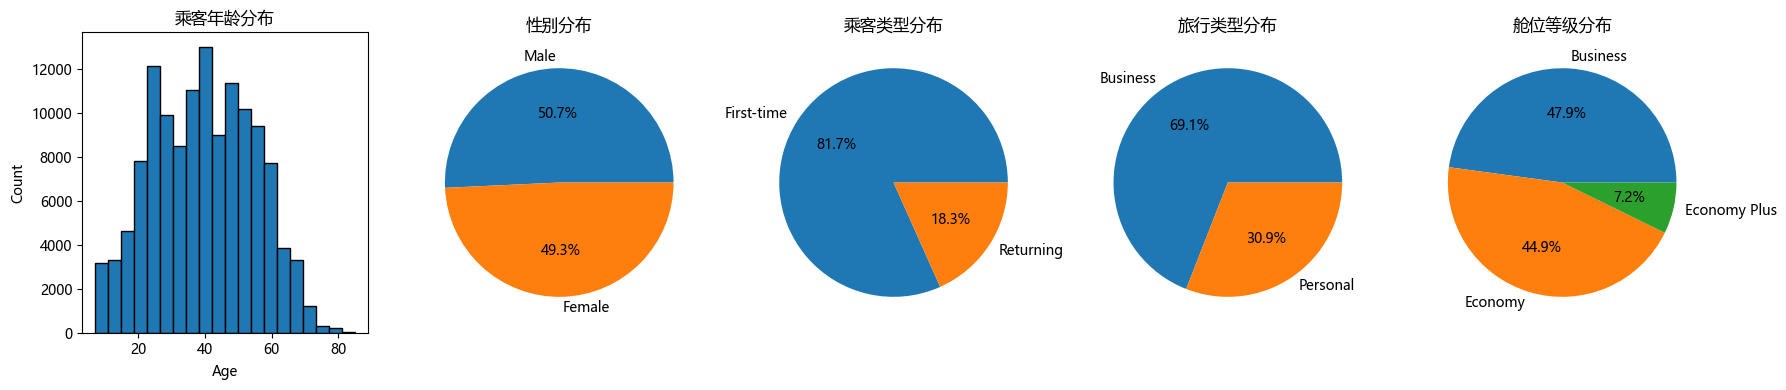

In [37]:
# 描述性分析——乘客基本情况(年龄、性别等）
plt.figure(figsize=(18, 4))  # 调整整体图的大小

# 年龄分布图
plt.subplot(1, 5, 1)
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('乘客年龄分布')

# 性别分布图
plt.subplot(1, 5, 2)
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].unique(), autopct='%1.1f%%')
plt.title('性别分布')

# 乘客类型分布图
plt.subplot(1, 5, 3)
plt.pie(df['Customer Type'].value_counts(), labels=df['Customer Type'].unique(), autopct='%1.1f%%')
plt.title('乘客类型分布')

# 旅行类型分布图
plt.subplot(1, 5, 4)
plt.pie(df['Type of Travel'].value_counts(), labels=df['Type of Travel'].unique(), autopct='%1.1f%%')
plt.title('旅行类型分布')

# 舱位等级分布图
plt.subplot(1, 5, 5)
plt.pie(df['Class'].value_counts(), labels=df['Class'].unique(), autopct='%1.1f%%')
plt.title('舱位等级分布')

plt.tight_layout()
plt.show()

#### 描述性分析——客户满意度整体分布情况

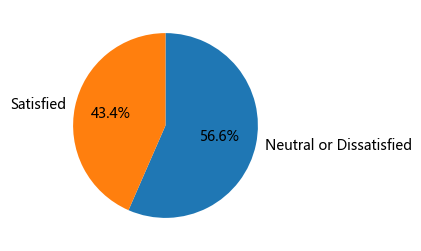

In [38]:
dist = df['Satisfaction'].value_counts()
fig = plt.figure(figsize=(3,3))
plt.pie(dist.values,
        labels=dist.index,
        autopct='%1.1f%%',
        counterclock=False,
        startangle=90,
        )
plt.show()
#整体来看乘客满意度，仅有43.4%的乘客觉得满意，56.6%的乘客持中立或不满意态度。

#### 描述性分析——具体服务指标客户满意度分布情况


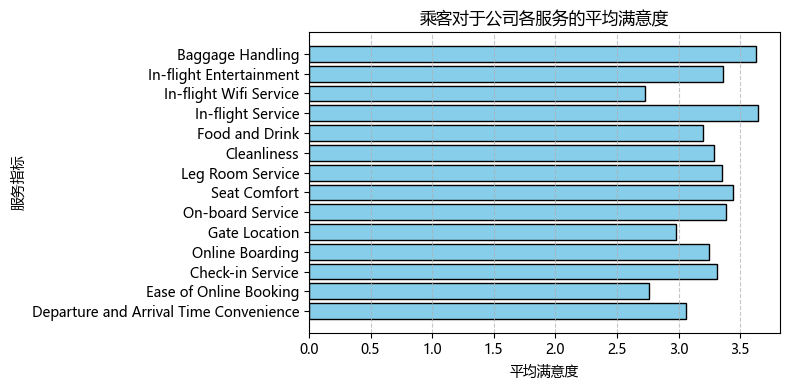

In [39]:
data = df[['Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']]
score = round(data.mean(),2)
x_label = score.index
y_label = score.values

plt.figure(figsize=(8, 4))  # 缩小图表尺寸
plt.barh(x_label, y_label, color='skyblue', edgecolor='black')
plt.title('乘客对于公司各服务的平均满意度', fontsize=12)
plt.xlabel('平均满意度', fontsize=10)
plt.ylabel('服务指标', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### 探索性分析——不同特征客户的满意度分布（性别、年龄、飞行距离等）

<Figure size 800x600 with 0 Axes>

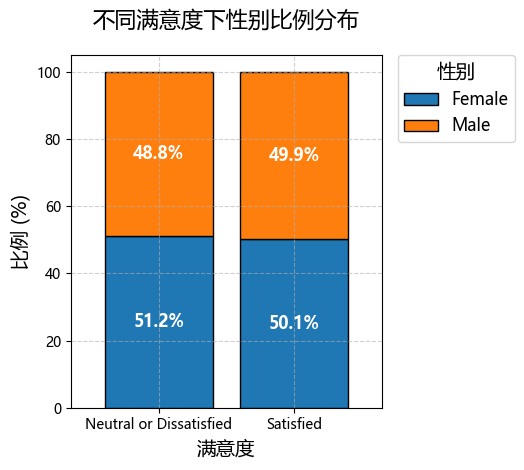

In [40]:
# 性别
satisfaction_gender = df.groupby(['Satisfaction', 'Gender'])['Gender'].count().unstack()
# 计算每个满意度下性别的比例
satisfaction_gender_percent = satisfaction_gender.div(satisfaction_gender.sum(axis=1), axis=0) * 100

# 绘制堆叠柱状图
plt.figure(figsize=(8, 6))  # 增大图表尺寸
ax = satisfaction_gender_percent.plot(kind='bar',
                                    stacked=True,
                                    color=['#1f77b4', '#ff7f0e'],  # 使用更醒目的颜色
                                    edgecolor='black',  # 添加边框
                                    width=0.8)  # 调整柱状图宽度

# 添加百分比标注
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # 只标注有值的部分
        ax.text(x + width/2,
                y + height/2,
                f'{height:.1f}%',
                ha='center',
                va='center',
                fontsize=12,  # 增大字体
                color='white',  # 白色文字更清晰
                weight='bold')  # 加粗字体

# 添加网格线
ax.grid(True, linestyle='--', alpha=0.6)

# 调整标签和标题
plt.xlabel('满意度', fontsize=14)
plt.ylabel('比例 (%)', fontsize=14)
plt.title('不同满意度下性别比例分布', fontsize=16, pad=20)
plt.xticks(rotation=0)  # 保持x轴标签水平
# 调整图例位置和样式
plt.legend(title='性别',
           fontsize=12,
           title_fontsize=14,
           bbox_to_anchor=(1.05, 1),  # 将图例放在图表右侧
           loc='upper left',  # 定位在右侧上部
           borderaxespad=0.)  # 调整图例与图表的间距
# 调整图表布局，为图例留出空间
plt.tight_layout(rect=[0, 0, 0.85, 1])  # 右侧留出15%的空间
plt.show()


#### 探索性分析——各项服务指标之间的相关性关系


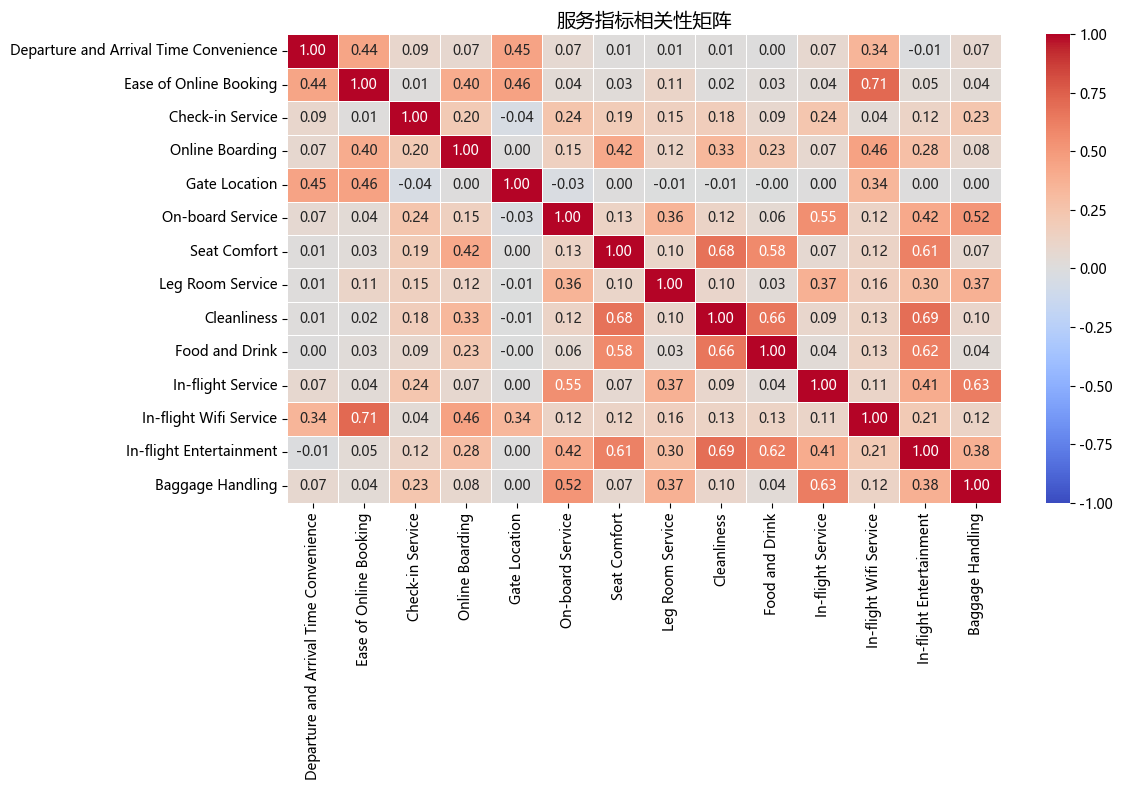

In [41]:
# 计算相关性矩阵
corr_matrix = df[['Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']].corr()

# 可视化相关性矩阵
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,
           annot=True,
           fmt='.2f',
           cmap='coolwarm',
           vmin=-1,
           vmax=1,
           linewidths=0.5)
plt.title('服务指标相关性矩阵', fontsize=14)
plt.tight_layout()
plt.show()


#### 特征工程

   Age  Flight Distance  Gender_Male  Customer Type_Returning  \
0   48              821          1.0                      0.0   
1   35              821          0.0                      1.0   
2   41              853          1.0                      1.0   
3   50             1905          1.0                      1.0   
4   49             3470          0.0                      1.0   

   Type of Travel_Personal  Class_Economy  Class_Economy Plus  
0                      0.0            0.0                 0.0  
1                      0.0            0.0                 0.0  
2                      0.0            0.0                 0.0  
3                      0.0            0.0                 0.0  
4                      0.0            0.0                 0.0  


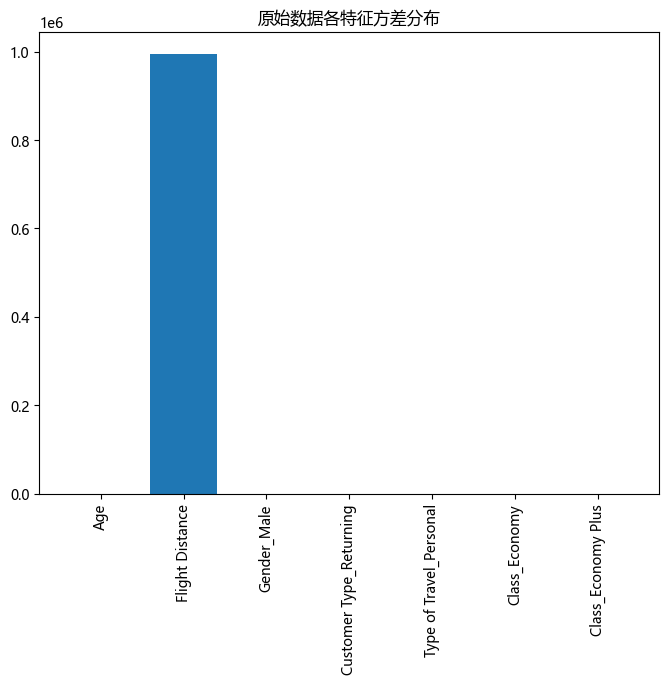

Age                           228.595045
Flight Distance            994911.444525
Gender_Male                     0.249947
Customer Type_Returning         0.149571
Type of Travel_Personal         0.213680
Class_Economy                   0.247395
Class_Economy Plus              0.067209
dtype: float64


In [54]:
from sklearn.preprocessing import OneHotEncoder

# 定义用于聚类的特征
cluster_features = df[[
    'Age', 'Gender', 'Customer Type', 'Type of Travel', 'Class',
    'Flight Distance'
]]

# 在进行Kmeans聚类之前，保留原始数据的副本
original_features = df[['Age', 'Gender', 'Customer Type', 'Type of Travel', 'Class', 'Flight Distance', 'Satisfaction']].copy()

# 对类别型特征进行one-hot编码
categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# 使用OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first'避免多重共线性
encoded_features = encoder.fit_transform(cluster_features[categorical_features])

# 获取编码后的特征名称
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# 将编码后的特征转换为DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# 合并数值特征和编码后的类别特征
cluster_features = pd.concat([
    cluster_features.drop(categorical_features, axis=1).reset_index(drop=True),
    encoded_df
], axis=1)

print(cluster_features.head())

# 2. 计算原始数据的方差并绘制分布图
variances_raw = cluster_features.var()
plt.figure(figsize=(8, 6))
plt.bar(range(len(variances_raw)), variances_raw)
plt.xticks(range(len(variances_raw)), cluster_features.columns, rotation=90)
plt.title('原始数据各特征方差分布')
plt.show()
print(variances_raw)


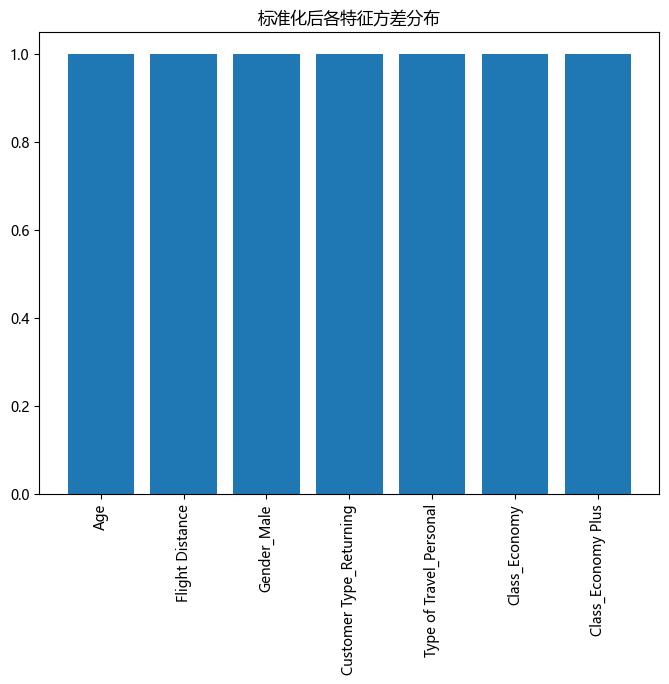

Age                        1.000008
Flight Distance            1.000008
Gender_Male                1.000008
Customer Type_Returning    1.000008
Type of Travel_Personal    1.000008
Class_Economy              1.000008
Class_Economy Plus         1.000008
dtype: float64


In [43]:
# 对所有特征进行标准化（KMeans对尺度敏感，必须标准化所有特征）
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cluster_features_scaled = scaler.fit_transform(cluster_features)
cluster_features = pd.DataFrame(cluster_features_scaled, columns=cluster_features.columns)

# 查看标准化后各特征的方差
variances_scaled = cluster_features.var()
plt.figure(figsize=(8, 6))
plt.bar(range(len(variances_scaled)), variances_scaled)
plt.xticks(range(len(variances_scaled)), cluster_features.columns, rotation=90)
plt.title('标准化后各特征方差分布')
plt.show()
print(variances_scaled)

#### 选择最优的k值

712271.5668866491
563088.010093306
428097.2241227204
369233.2090019498
329240.42622832727
293134.9474764292
266996.95593882515
244266.29348532
224592.20507430556
205152.9238982172
189459.24257325672
175922.17958548455
164249.92005861975


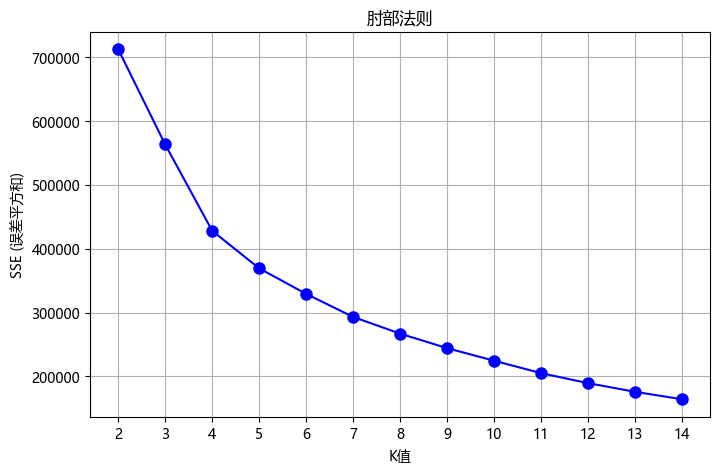

In [44]:
from sklearn.cluster import KMeans

# 计算不同K值的SSE
sse = []
k_range = range(2, 15)
for k in k_range:
    kmeans = KMeans(n_clusters=k,
                   random_state=42,
                   init='k-means++',
                   n_init=50,        # 增加初始化次数
                   max_iter=500,     # 增加最大迭代次数
                   algorithm='lloyd')
    kmeans.fit(cluster_features)
    sse.append(kmeans.inertia_)
    print(kmeans.inertia_)

# 绘制肘部法则图
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, 'bo-', markersize=8)
plt.xlabel('K值')
plt.ylabel('SSE (误差平方和)')
plt.title('肘部法则')
plt.xticks(k_range)
plt.grid(True)
plt.show()

#### Kmeans聚类

In [45]:
# 对客户特征进行kmeans聚类

# 假设最优n_cluster为k
optimal_k = 5 # 根据肘部法则确定的最优k值

# 进行KMeans聚类
kmeans = KMeans(n_clusters=optimal_k,
               random_state=42,
               init='k-means++',
               n_init=50,        # 增加初始化次数
               max_iter=500,     # 增加最大迭代次数
               algorithm='lloyd')  # 使用更高效的elkan算法
cluster_labels = kmeans.fit_predict(cluster_features)

# 将聚类结果添加到原始数据中
cluster_features.loc[:, 'Cluster'] = cluster_labels

#### 聚类结果分析

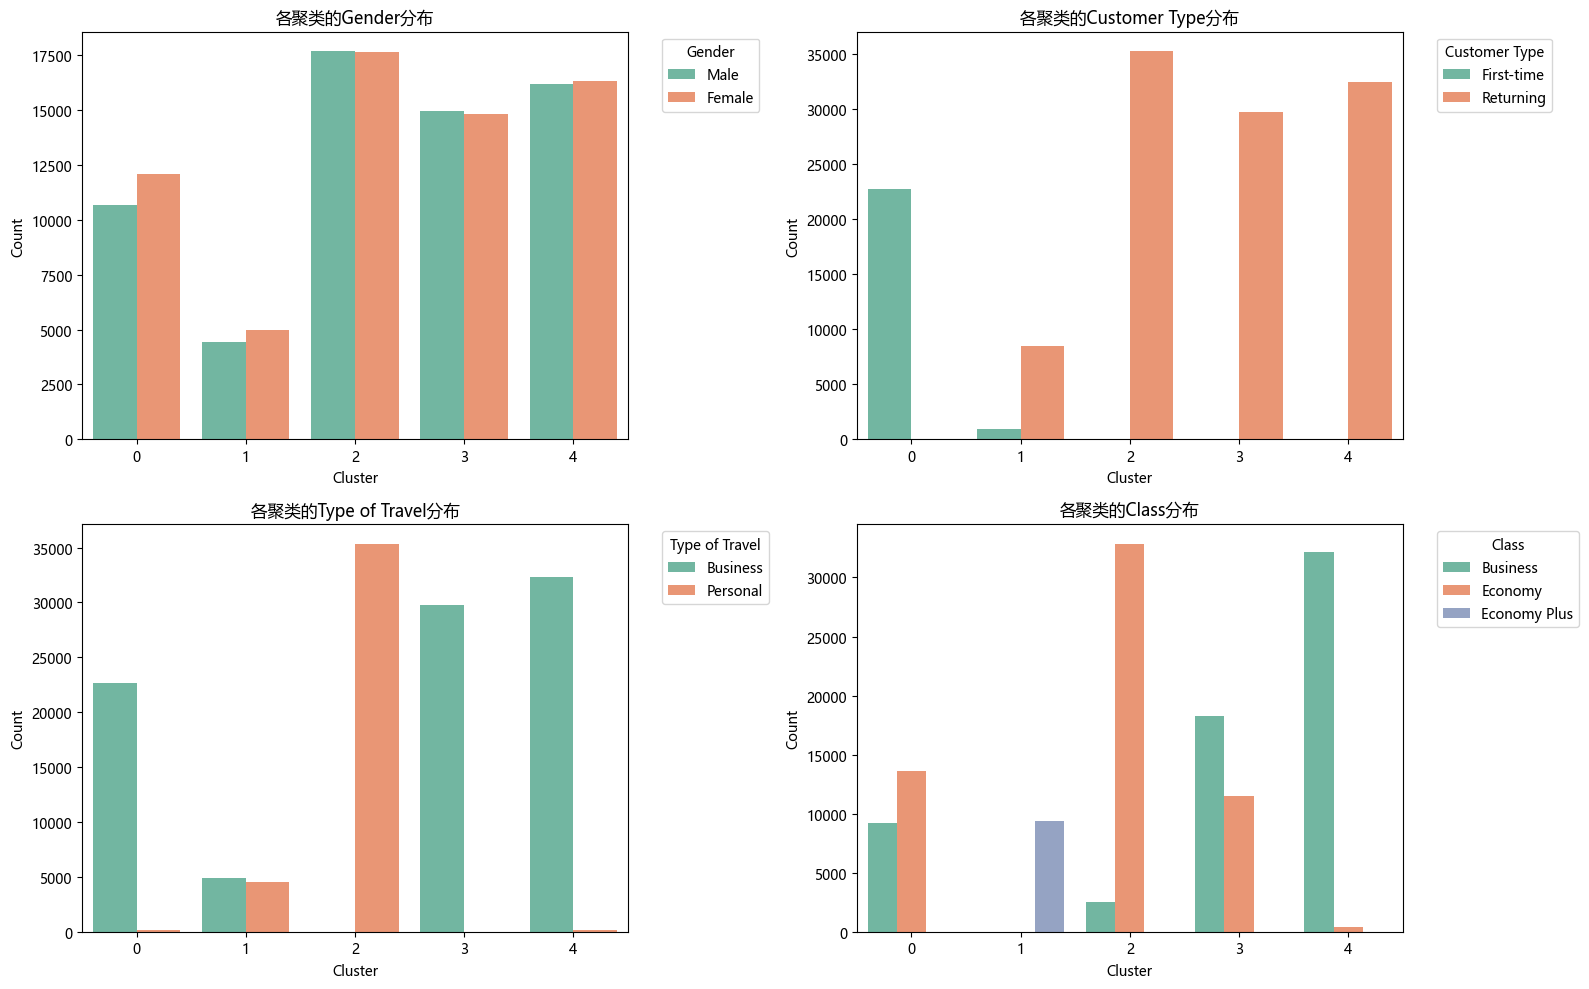

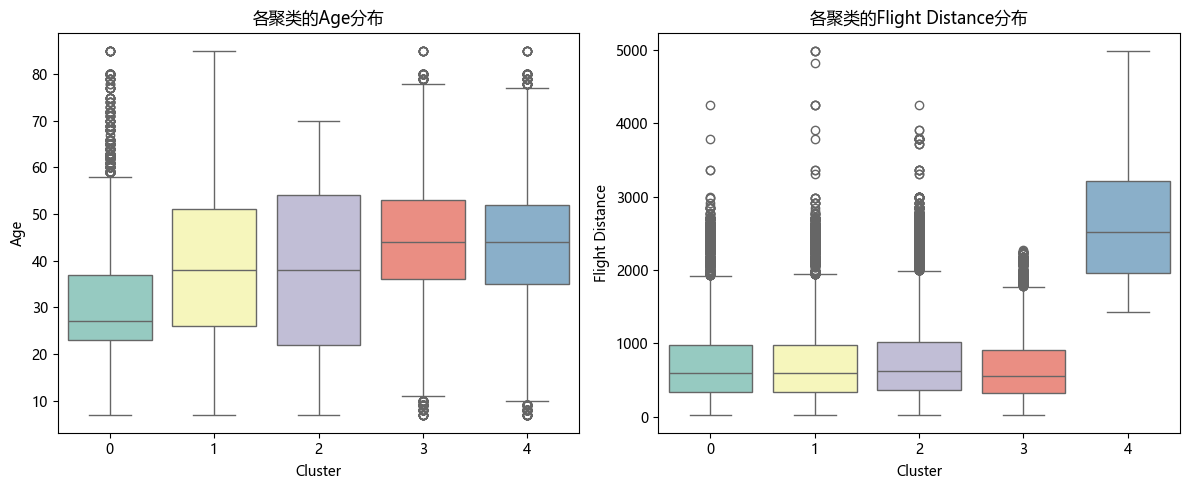

In [56]:
# 1. 将聚类标签添加到原始数据副本
original_features['Cluster'] = cluster_labels

# 2. 统计每个聚类的主要特征分布
categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
numerical_features = ['Age', 'Flight Distance']

# 3. 可视化每个聚类的类别特征分布
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(2, 2, i+1)
    sns.countplot(x='Cluster', hue=col, data=original_features, palette='Set2')
    plt.title(f'各聚类的{col}分布')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 4. 可视化每个聚类的数值特征分布（箱线图）
plt.figure(figsize=(12, 5))
for i, col in enumerate(numerical_features):
    plt.subplot(1, 2, i+1)
    sns.boxplot(x='Cluster', y=col, hue='Cluster', data=original_features, palette='Set3', legend=False)
    plt.title(f'各聚类的{col}分布')
    plt.xlabel('Cluster')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [57]:
# 5. 自动生成每个聚类的中文特征总结
def summarize_cluster(group, cluster_id):
    summary = f"Cluster {cluster_id} 特征总结："
    # 性别
    gender_main = group['Gender'].value_counts(normalize=True).idxmax()
    gender_pct = group['Gender'].value_counts(normalize=True).max()
    # 客户类型
    cust_main = group['Customer Type'].value_counts(normalize=True).idxmax()
    cust_pct = group['Customer Type'].value_counts(normalize=True).max()
    # 旅行类型
    travel_main = group['Type of Travel'].value_counts(normalize=True).idxmax()
    travel_pct = group['Type of Travel'].value_counts(normalize=True).max()
    # 舱位
    class_main = group['Class'].value_counts(normalize=True).idxmax()
    class_pct = group['Class'].value_counts(normalize=True).max()
    # 平均年龄、飞行距离
    age_mean = group['Age'].mean()
    dist_mean = group['Flight Distance'].mean()
    summary += f"以{gender_main}({gender_pct:.0%})、{class_main}({class_pct:.0%})、{cust_main}({cust_pct:.0%})、{travel_main}({travel_pct:.0%})为主，平均年龄{age_mean:.1f}岁，平均飞行距离{dist_mean:.1f}。"
    return summary

print('\n【自动特征总结】')
for cluster in range(optimal_k):
    group = original_features[original_features['Cluster'] == cluster]
    print(summarize_cluster(group, cluster))


【自动特征总结】
Cluster 0 特征总结：以Female(53%)、Economy(60%)、First-time(100%)、Business(99%)为主，平均年龄30.2岁，平均飞行距离711.1。
Cluster 1 特征总结：以Female(53%)、Economy Plus(100%)、Returning(90%)、Business(52%)为主，平均年龄38.7岁，平均飞行距离747.1。
Cluster 2 特征总结：以Male(50%)、Economy(93%)、Returning(100%)、Personal(100%)为主，平均年龄38.4岁，平均飞行距离782.9。
Cluster 3 特征总结：以Male(50%)、Business(61%)、Returning(100%)、Business(100%)为主，平均年龄43.8岁，平均飞行距离638.7。
Cluster 4 特征总结：以Female(50%)、Business(99%)、Returning(100%)、Business(99%)为主，平均年龄43.2岁，平均飞行距离2601.8。


每个聚类群体的满意度分布（占比）：
Satisfaction  Neutral or Dissatisfied  Satisfied
Cluster                                         
0                               0.754      0.246
1                               0.754      0.246
2                               0.897      0.103
3                               0.340      0.660
4                               0.226      0.774


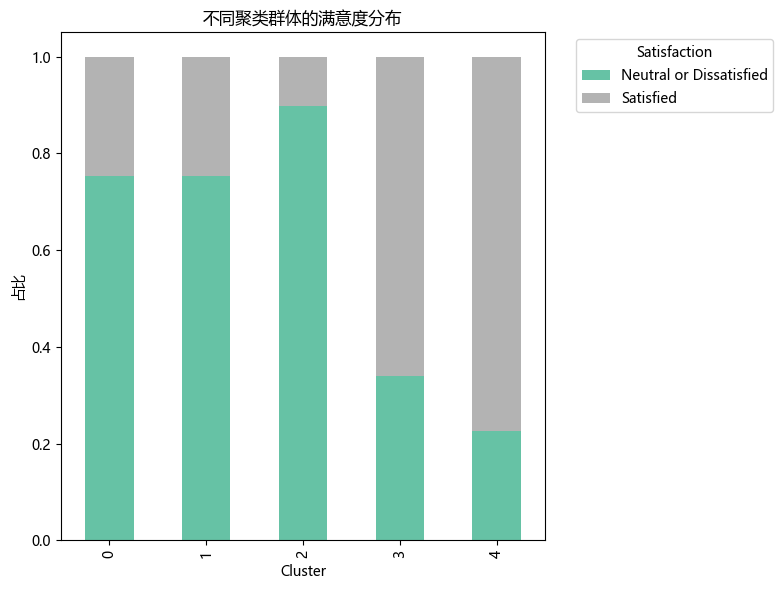

In [58]:
# 统计和可视化每个聚类群体的满意度分布
import matplotlib.pyplot as plt
import seaborn as sns

# 统计每个聚类的满意度分布
satisfaction_counts = original_features.groupby('Cluster')['Satisfaction'].value_counts(normalize=True).unstack().fillna(0)
print('每个聚类群体的满意度分布（占比）：')
print(satisfaction_counts.round(3))

# 可视化
plt.figure(figsize=(8, 6))
satisfaction_counts.plot(kind='bar', stacked=True, colormap='Set2', ax=plt.gca())
plt.title('不同聚类群体的满意度分布')
plt.xlabel('Cluster')
plt.ylabel('占比')
plt.legend(title='Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Cluster0代表第一次乘坐航班、以经济舱为主、中短途商务出行的年轻旅客，其中75.4%的人觉得中立或不满意；
Cluster1代表经常乘坐航班、以超级经济舱为主、中短途商务或私人出行的中青年旅客，其中75.4%的人觉得中立或不满意；
Cluster2代表经常乘坐航班、以经济舱为主、中短途私人出行的中青年旅客，其中89.7%的人觉得中立或不满意；
Cluster3代表经常乘坐航班、以商务舱为主、中短途商务出行的中年旅客，其中66.0%的人觉得满意；
Cluster4代表经常乘坐航班、以商务舱为主、中长途商务出行的中年旅客，其中77.4%的人觉得满意。